# A3: Predictiong Car Price

## Importing libraries

In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [199]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.0.2', '2.2.3', '0.13.2', '3.10.0')

## 1. Load data

In [200]:
df = pd.read_csv('../data/Cars.csv')

In [201]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [202]:
# Check the shape of your data
df.shape

(8128, 13)

In [203]:
# Statistical 
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [204]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [205]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 2. Exploratory Data Analysis

#### Data Cleaning and Preprocessing

map First owner to 1, ..., Test Drive Car to 5

In [206]:
owner_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}
df['owner'] = df['owner'].map(owner_mapping)

In [207]:
df['owner'].unique()

array([1, 2, 3, 4, 5])

For the feature fuel, remove all rows with CNG and LPG

In [208]:
df = df[~df['fuel'].isin(['CNG','LPG'])]
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float). Hint: use df.mileage.str.split

In [209]:
df['mileage'] = df['mileage'].str.split().str[0]
df['mileage'] = df['mileage'].astype(float)
df['mileage'].unique()

array([23.4 , 21.14, 17.7 , 23.  , 16.1 , 20.14, 23.59, 20.  , 19.01,
       17.3 , 19.3 ,   nan, 18.9 , 18.15, 24.52, 19.7 , 22.54, 21.  ,
       25.5 , 26.59, 21.5 , 20.3 , 21.4 , 24.7 , 18.2 , 16.8 , 24.3 ,
       14.  , 18.6 , 23.95, 17.  , 20.63, 13.93, 16.  , 17.8 , 18.5 ,
       12.55, 12.99, 14.8 , 13.5 , 26.  , 20.65, 27.3 , 11.36, 17.68,
       14.28, 18.53, 14.84, 21.12, 20.36, 21.27, 18.16, 22.  , 25.1 ,
       20.51, 21.66, 25.2 , 22.9 , 16.02, 20.54, 22.77, 15.71, 23.1 ,
       19.02, 19.81, 16.47, 15.04, 19.1 , 21.79, 18.8 , 21.21, 15.37,
       11.79, 19.  , 14.3 , 15.8 , 15.1 , 19.09, 22.32, 21.9 , 14.53,
       21.63, 20.85, 20.45, 19.67, 23.01, 20.77, 17.92, 17.01, 22.37,
       19.33,  9.5 , 12.83, 22.48, 16.78, 14.67, 15.  , 13.96, 18.  ,
       12.07, 26.21, 10.8 , 16.3 , 13.6 , 14.74, 15.6 , 19.56, 22.69,
       19.16, 18.12, 12.1 , 17.5 , 42.  , 20.4 , 21.1 , 19.44, 13.  ,
       21.43, 22.95, 16.2 , 15.3 , 28.09, 17.4 , 19.4 , 17.6 , 28.4 ,
       14.1 , 25.17,

For the feature engine, remove “CC” and convert the column to numerical type (e.g., float). Do the same for max power

In [210]:
df['engine'] = df.engine.str.split().str[0].astype(float)

In [211]:
df['max_power'] = df.max_power.str.split().str[0].astype(float)

For the feature brand, take only the first word and remove the rest

In [212]:
df.rename(columns = {'name':'brand'},  inplace = True)
df['brand'] = df['brand'].str.split().str.get(0)
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [213]:
#Drop the feature torque,

df = df.drop(columns=['torque'])

In [214]:
#Delete 'Test Driver Car' sample
df = df[df['owner'] != 5]
df['owner'].unique()

array([1, 2, 3, 4])

In [215]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


## Univariate analysis

Distribution Plot

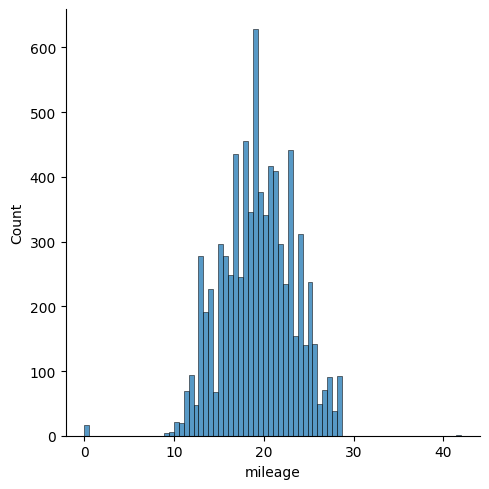

In [216]:
sns.displot(data = df, x = 'mileage')

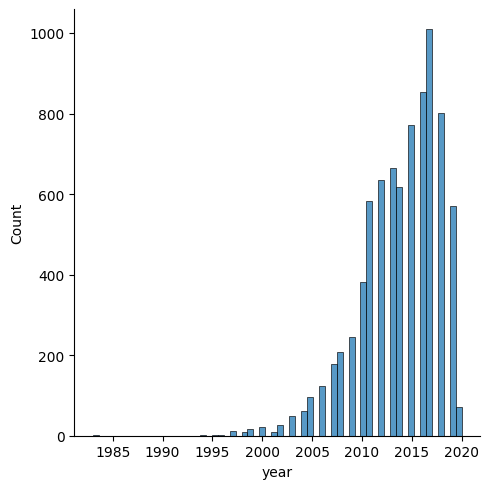

In [217]:
sns.displot(data = df, x = 'year')

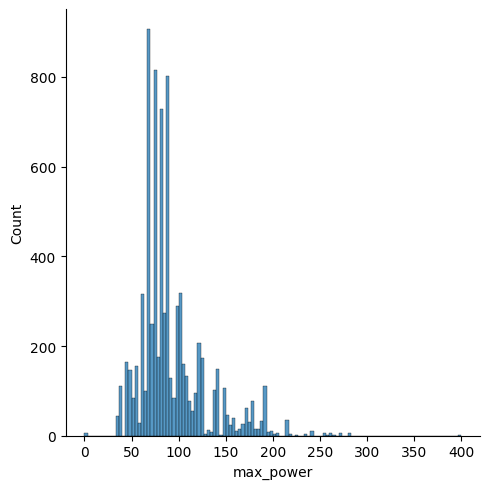

In [218]:
sns.displot(data = df, x = 'max_power')

### Correlation matrix
As the correlation matrix requires numerical values, I applied label encoding to the categorical features: ‘brand’, ‘fuel’, ‘transmission’, and ‘seller_type’.

In [219]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["brand"] = le.fit_transform(df["brand"])

df["brand"].unique()

array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [220]:
# To view the mapping
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(label_mapping)

{'Ambassador': 0, 'Ashok': 1, 'Audi': 2, 'BMW': 3, 'Chevrolet': 4, 'Daewoo': 5, 'Datsun': 6, 'Fiat': 7, 'Force': 8, 'Ford': 9, 'Honda': 10, 'Hyundai': 11, 'Isuzu': 12, 'Jaguar': 13, 'Jeep': 14, 'Kia': 15, 'Land': 16, 'Lexus': 17, 'MG': 18, 'Mahindra': 19, 'Maruti': 20, 'Mercedes-Benz': 21, 'Mitsubishi': 22, 'Nissan': 23, 'Opel': 24, 'Peugeot': 25, 'Renault': 26, 'Skoda': 27, 'Tata': 28, 'Toyota': 29, 'Volkswagen': 30, 'Volvo': 31}


In [221]:
df['fuel'] = le.fit_transform(df['fuel'])

df['fuel'].unique()

array([0, 1])

In [222]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [223]:
df['transmission'] = le.fit_transform(df['transmission'])
df['transmission'].unique()

array([1, 0])

In [224]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [225]:
df['seller_type'] = le.fit_transform(df['seller_type'])
df['seller_type'].unique()

array([1, 0, 2])

In [226]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [227]:
# Apply log transformation to the 'selling_price' column
df['selling_price'] = np.log(df['selling_price'])

In [228]:
df['selling_price']

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8028, dtype: float64

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   int64  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int64  
 5   seller_type    8028 non-null   int64  
 6   transmission   8028 non-null   int64  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 815.3 KB


<Axes: >

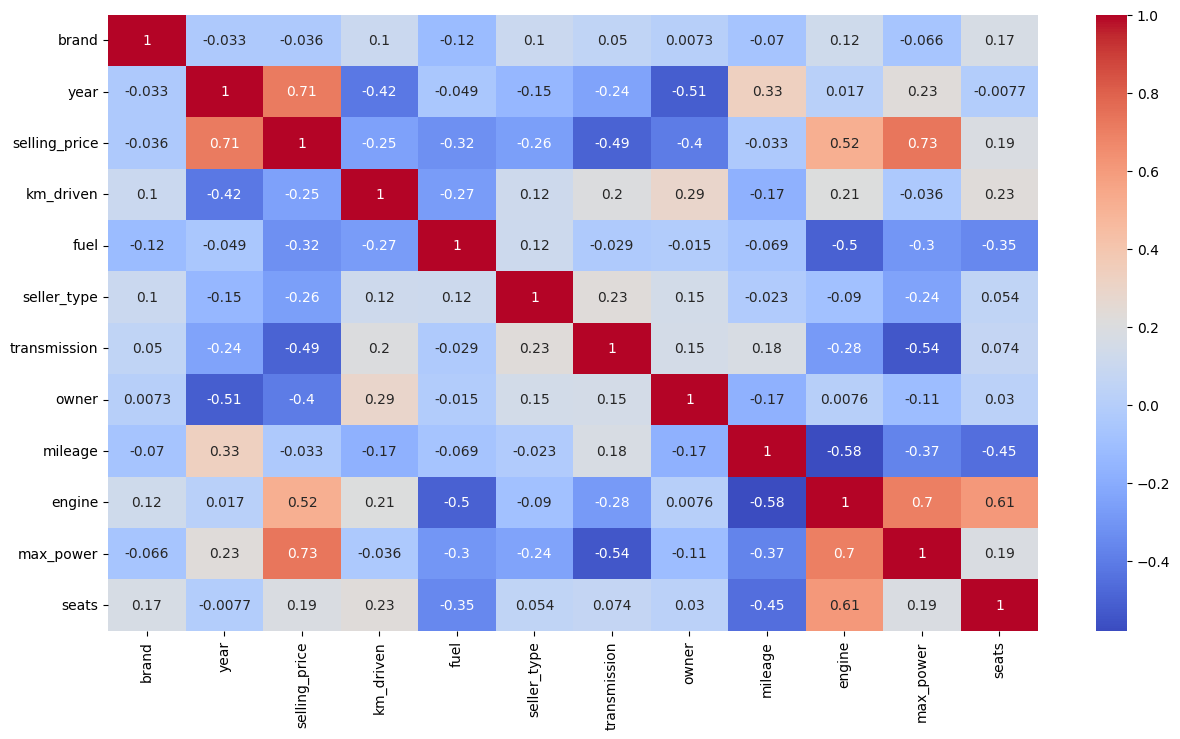

In [230]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## 3. Feature Engineering

We gonna skip.

## 4. Feature selection

In [231]:
#x is our strong features
X = df[['year', 'mileage','max_power']]
y = df['selling_price']

In [232]:
X.shape , y.shape

((8028, 3), (8028,))

In [233]:
# convert continuous y-values into categorical data {0, 1, 2, 3}
# I use pd.qcut to have a balance dataset.
y, c = pd.qcut(y, 4, labels=[0, 1, 2, 3], retbins = True)
y

0       1
1       1
2       0
3       0
4       0
       ..
8123    1
8124    0
8125    1
8126    1
8127    1
Name: selling_price, Length: 8028, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

### Train test split

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

m = X.shape[0]  #number of samples
n = X.shape[1]  #number of features

In [236]:
X_train.shape , X_test.shape

((6422, 3), (1606, 3))

In [237]:
y_train.shape , y_test.shape

((6422,), (1606,))

## 5. Preprocessing

### Null values

In [238]:
#check for null values
X_train[['year', 'mileage','max_power']].isna().sum()

year           0
mileage      171
max_power    165
dtype: int64

In [239]:
X_test[['year', 'mileage','max_power']].isna().sum()

year          0
mileage      43
max_power    43
dtype: int64

In [240]:
y_train.isna().sum()

np.int64(0)

In [241]:
y_test.isna().sum()

np.int64(0)

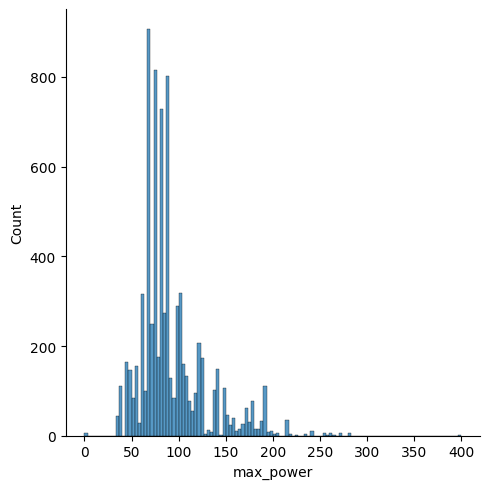

In [242]:
sns.displot(data=df, x='max_power')

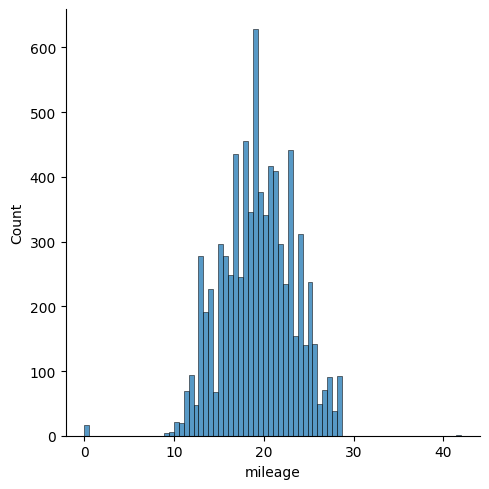

In [243]:
sns.displot(data=df, x='mileage')

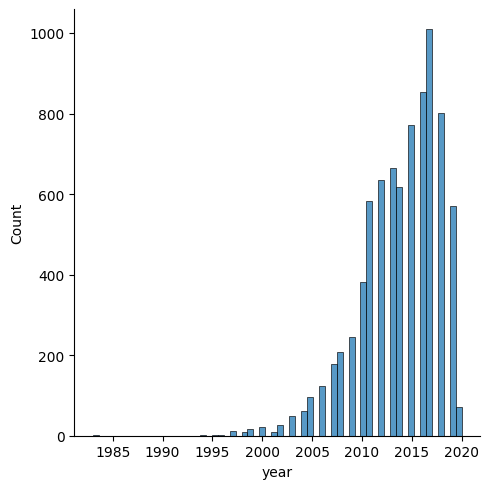

In [244]:
sns.displot(data=df, x='year')

In [245]:
#let's fill the training set first!
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [246]:
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [247]:
#check again
X_train[['year', 'mileage','max_power']].isna().sum()

year         0
mileage      0
max_power    0
dtype: int64

In [248]:
X_test[['year', 'mileage','max_power']].isna().sum()

year         0
mileage      0
max_power    0
dtype: int64

In [249]:
y_train.isna().sum(), y_test.isna().sum()

(np.int64(0), np.int64(0))

### Checking Outliers

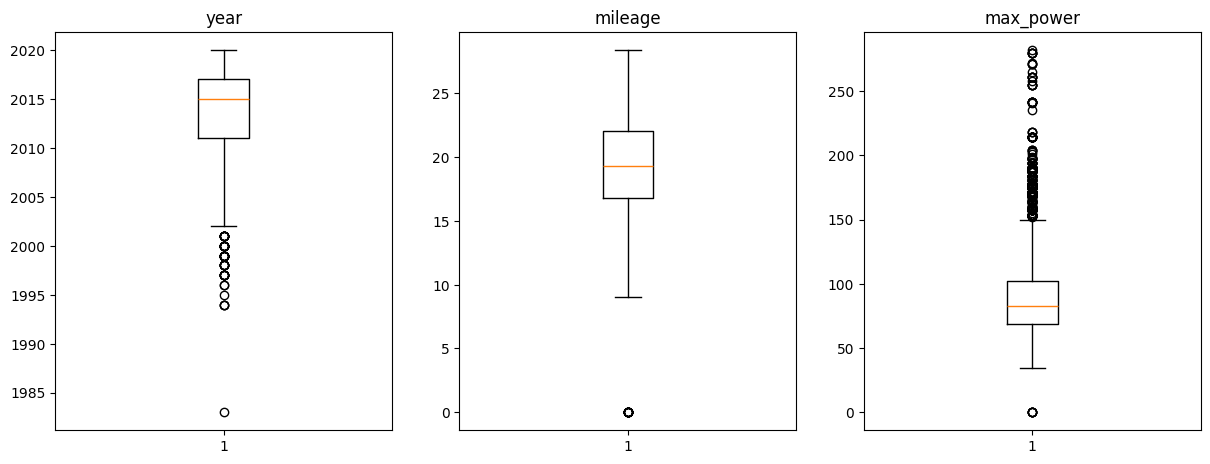

In [250]:
# Create a dictionary of columns.
col_dict = {'year':1,'mileage':2, 'max_power':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [251]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [252]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%

---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%


### Scaling

In [253]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [254]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 3)
Shape of X_test:  (1606, 3)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


In [256]:
#check again
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 4)
Shape of X_test:  (1606, 4)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


In [255]:
# Adding intercepts to include a bias in theta
# actually you can do like this too
# X = np.insert(X, 0, 1, axis=1)
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [257]:
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

## 6. Modeling

In [258]:
#experiment tracking
import mlflow
import os
import logging

mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th")
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'
mlflow.set_experiment(experiment_name="st124642-a3")

logging.getLogger("mlflow").setLevel(logging.WARNING)

In [259]:
class PolynomialFeatures:
    def __init__(self, degree):
        self.degree = degree
    
    def fit_transform(self, X):
        # Transform input features to include polynomial terms
        X_poly = np.column_stack([X ** self.degree])
        return X_poly

In [265]:
import time
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from math import sqrt, isnan

class LogisticRegression:

    def __init__(self, k, n, m, method, init_theta, momentum, alpha, max_iter):
        self.k = k
        self.n = n
        self.m = m
        self.cv = KFold(n_splits=3)
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.init_theta = init_theta
        self.momentum = momentum
        self.prev_step = 0
        
        
    
    def fit(self, X_train, y_train):
        self.kfold_accuracy = list()
        self.kfold_f1 = list()
        self.kfold_recall = list()
        self.kfold_precision = list()

        self.losses = []

        self.n = X_train.shape[1]

        #reset val loss
        self.val_loss_old = np.inf

        start_time = time.time()
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]

            # reset the prev_step for each fold.
            self.prev_step = 0
            
            # initialize theta
            if self.init_theta == 'zero':
                self.W = np.zeros((self.n, self.k))
            else:
                m = X_cross_train.shape[1]
                sqrt_m = sqrt(m)
                lower, upper = -(1 / sqrt_m), (1 / sqrt_m)
                numbers = np.random.uniform(lower, upper, size = (self.n, self.k))
                scaled = lower + numbers * (upper - lower)
                self.W = scaled

            perm = np.random.permutation(X_cross_train.shape[0])
            X_cross_train = X_cross_train[perm]
            y_cross_train = y_cross_train[perm]

            # Batch Gradient Descent
            if self.method == "batch":
                
                for i in range(self.max_iter):
                    loss =  self.gradient(X_cross_train, y_cross_train)
            
            # Minibatch Gradient Descent
            elif self.method == "minibatch":
                start_time = time.time()
                batch_size = int(0.3 * X.shape[0])
                for i in range(self.max_iter):

                    ix = np.random.randint(0, X_cross_train.shape[0]) #<----with replacement
                    batch_X = X_cross_train[ix:ix+batch_size]
                    batch_Y = y_cross_train[ix:ix+batch_size]
                    loss = self.gradient(batch_X, batch_Y)

            # Stochastic Gradient Descent
            elif self.method == "sto":
                list_of_used_ix = [] # without replacement

                for i in range(self.max_iter):
                    idx = np.random.randint(X_cross_train.shape[0])
                    while i in list_of_used_ix:
                        idx = np.random.randint(X_cross_train.shape[0])

                    sto_x = X_cross_train[idx, :].reshape(1, -1)
                    sto_y = y_cross_train[idx]
                    loss = self.gradient(sto_x, sto_y)
                    
                    list_of_used_ix.append(i)
                    if len(list_of_used_ix) == X.shape[0]:
                        list_of_used_ix = []

            else:
                raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')

            # Compute some matrics to measure current model's performance
            yhat_val = self.predict(X_cross_val)
            ytrue_val = self._decodeY(y_cross_val)
            val_f1 = self.weighted_f1(ytrue_val, yhat_val)
            val_accuracy = self.accuracy(ytrue_val, yhat_val)

            self.kfold_accuracy.append(val_accuracy)
            self.kfold_f1.append(val_f1)
        
        print(f"Time taken: {time.time() - start_time}")

        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y

        grad = self.softmax_grad(X, error)
        
        step = self.alpha * grad + self.regularization.derivation(self.W)
        step += self.momentum * self.prev_step

        self.W -= step
        self.prev_step = step

        return loss

    def softmax(self, theta_t_x):

        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''

        prediction = self.softmax(X @ W)
        return prediction
    
    def getThetas(self):
        return self.W
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def avgKfoldAccuracy(self):
        return np.sum(np.array(self.kfold_accuracy)) / len(self.kfold_accuracy)
    
    def avgKfoldf1(self):
        return np.sum(np.array(self.kfold_f1)) / len(self.kfold_f1)

    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
    
    def accuracy(self, ytrue, yhat):    
        match = yhat == ytrue
        return match.sum() / match.value_counts().sum()
    
    # decode one hot array into integers.
    def _decodeY(self, y):
        return pd.Series(np.argmax(y, axis=1))
    
    # encode y label into one hot array.
    def _encodeY(self, y):
        m = y.shape[0]
        k = self.k
        
        if y.ndim == 2:
            return y
        
        encodedY = np.zeros((m, k))
        for each_class in range(k):
            cond = (y == each_class)
            encodedY[np.where(cond), each_class] = 1
        
        return encodedY
    
    def precision(self, ytrue, yhat):
        TP, _, FP = self.confusion_matrix(ytrue, yhat)
        precision = TP / (TP + FP)
        return precision
    
    def recall(self, ytrue, yhat):
        TP, FN, _ = self.confusion_matrix(ytrue, yhat)
        recall = TP / (TP + FN)
        return recall
    
    def f1(self, ytrue, yhat):
        precision = self.precision(ytrue, yhat)
        recall = self.recall(ytrue, yhat)
        
        f1 = (2 * precision * recall) / (precision + recall)
        return f1
    
    def macro_precision(self, ytrue, yhat):
        precision = self.precision(ytrue, yhat)
        return np.mean(precision)
    
    def macro_recall(self, ytrue, yhat):
        recall = self.recall(ytrue, yhat)
        return np.mean(recall)
    
    def macro_f1(self, ytrue, yhat):
        f1 = self.f1(ytrue, yhat)
        return np.mean(f1)
    
    def weighted_precision(self, ytrue, yhat):
        precision = self.precision(ytrue, yhat)
        weights = ytrue.value_counts().sort_index() / ytrue.value_counts().sum()
        return (precision * weights).sum()
    
    def weighted_recall(self, ytrue, yhat):
        recall = self.recall(ytrue, yhat)
        weights = ytrue.value_counts().sort_index() / ytrue.value_counts().sum()
        return (recall * weights).sum()
    
    def weighted_f1(self, ytrue, yhat):
        f1 = self.f1(ytrue, yhat)
        weights = ytrue.value_counts().sort_index() / ytrue.value_counts().sum()
        return (f1 * weights).sum()
    
    def support(self, ytrue):
        return ytrue.value_counts().sort_index().values
    
    # Compute TP, FP and FN rates for each class.
    def confusion_matrix(self, ytrue, yhat):
        
        Y_true_encoded = self._encodeY(ytrue)
        Y_hat_encoded = self._encodeY(yhat)
        confusion_matrix = (Y_true_encoded.T @ Y_hat_encoded).astype('int64')
        
        TP = []
        FN = []
        FP = []
        
        for c in range(k):
            TP_c = confusion_matrix[c][c]
            TP.append(TP_c)
            
            FN_c = confusion_matrix[c].sum() - TP_c
            FN.append(FN_c)
            
            FP_c = confusion_matrix[:, c].sum() - TP_c
            FP.append(FP_c)
        
        TP = np.array(TP)
        FN = np.array(FN)
        FP = np.array(FP)
        
        
        return (TP, FN, FP)
    
    def classification_report(self, ytrue, yhat):
        accuracy = self.accuracy(ytrue, yhat).round(2)
        precision = self.precision(ytrue, yhat).round(2)
        recall = self.recall(ytrue, yhat).round(2)
        f1 = self.f1(ytrue, yhat).round(2)
        support = self.support(ytrue).round(2)
        
        macro_precision = self.macro_precision(ytrue, yhat).round(2)
        macro_recall = self.macro_recall(ytrue, yhat).round(2)
        macro_f1 = self.macro_f1(ytrue, yhat).round(2)
        
        weighted_precision = self.weighted_precision(ytrue, yhat).round(2)
        weighted_recall = self.weighted_recall(ytrue, yhat).round(2)
        weighted_f1 = self.weighted_f1(ytrue, yhat).round(2)
    
        print("Report\t\t", "precision\t", "recall\t\t", "f1-score\t", "support\n")
        for c in range(k):
            print(c, "\t\t", precision[c], "\t\t", recall[c], "\t\t", f1[c], "\t\t", support[c])
        
        print()
        print('accuracy\t\t\t\t\t', accuracy, '\t\t', str(ytrue.shape[0]))
        print("macro avg\t " + str(macro_precision) + "\t\t " + str(macro_recall) + "\t\t " + str(macro_f1) + "\t\t " + str(ytrue.shape[0]))
        print("weighted avg\t " + str(weighted_precision) + "\t\t " + str(weighted_recall) + "\t\t " + str(weighted_f1) + "\t\t " + str(ytrue.shape[0]))

In [266]:
class NoRegularization:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0
        
    def derivation(self, theta): # return 0, since we won't have any regularization.
        return 0

class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
        
class Normal(LogisticRegression):
    
    def __init__(self, k, n, m, method, init_theta, momentum, alpha, max_iter, l = 0.001):
        self.regularization = NoRegularization(l)
        super().__init__(k, n, m, method, init_theta, momentum,  alpha, max_iter)
        
class Ridge(LogisticRegression):
    
    def __init__(self, k, n, m, method, init_theta, momentum, alpha, max_iter, l = 0.001):
        self.regularization = RidgePenalty(l)
        super().__init__(k, n, m, method, init_theta, momentum, alpha, max_iter)

In [267]:
import math

# Define possible hyper parameters
regs = ["Normal", "Ridge"]
momentums = [0, 0.4]
grads = ['sto', 'minibatch', 'batch']
init_thetas = ['zero', 'xavier']
alphas = [0.01, 0.001, 0.0001]

In [268]:
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [269]:
# from sklearn.preprocessing import PolynomialFeatures
m = X_train.shape[0]
n = X_train.shape[1]

# Try all possible combination of the defined hyperparameters.
for reg in regs:
    for momentum in momentums:
        for grad in grads:
            for init_theta in init_thetas:
                for alpha in alphas:

                    mlflow_params = {"reg": reg,
                                    "momentum": momentum, 
                                    "method": grad,
                                    "init_theta": init_theta,
                                    "alpha": alpha }
                    
                    current_run = f"reg-{reg}-momemtum{momentum}-method-{grad}-theta-{init_theta}-alpha-{alpha}"
                    mlflow.start_run(run_name=current_run, nested=True)
                    mlflow.log_params(params=mlflow_params)
                    
                    print(current_run)
                    params = {"k": k, "n": n, "m": m, "method": grad, "init_theta": init_theta, "momentum": momentum, "alpha": alpha, "max_iter": 50}

                    type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                    model = type_of_regression(**params)

                    model.fit(X_train, Y_train_encoded)
                    
                    print('Average Accuracy:', model.avgKfoldAccuracy())
                    print('Average f1:', model.avgKfoldf1())

                    # Record metric of current model to MLflow
                    mlflow.log_metric(key="cv_accuracy", value = model.avgKfoldAccuracy())
                    mlflow.log_metric(key="cv_f1", value = model.avgKfoldAccuracy())
                    
                    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                        
                    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                    # #######
                    mlflow.end_run()

reg-Normal-momemtum0-method-sto-theta-zero-alpha-0.01
Time taken: 0.0322260856628418
Average Accuracy: 0.5345759471292566
Average f1: 0.4912262812575923
🏃 View run reg-Normal-momemtum0-method-sto-theta-zero-alpha-0.01 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/742878610382977256/runs/91554031a21e4d1f88bb54a1ce914ecd
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/742878610382977256
reg-Normal-momemtum0-method-sto-theta-zero-alpha-0.001
Time taken: 0.012490034103393555
Average Accuracy: 0.5392342938126854
Average f1: 0.4731471944528274
🏃 View run reg-Normal-momemtum0-method-sto-theta-zero-alpha-0.001 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/742878610382977256/runs/8866ce8b5a85475ebd5eb49adfc9a51c
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/742878610382977256
reg-Normal-momemtum0-method-sto-theta-zero-alpha-0.0001
Time taken: 0.0158538818359375
Average Accuracy: 0.5398593838439836
Average f1: 0.48228816536516

### Load model from ML flow

In [270]:
import mlflow.pyfunc
import os

mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th")
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'

model_name = "st124642-a3-model"
model_version = 5

loaded_model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/{model_version}")

### Use the best model on test set

In [271]:
yhat = loaded_model.predict(X_test)
print("===Classification report (My Model)===")
model.classification_report(y_test, yhat)

===Classification report (My Model)===
Report		 precision	 recall		 f1-score	 support

0 		 0.77 		 0.81 		 0.79 		 411
1 		 0.57 		 0.44 		 0.5 		 456
2 		 0.44 		 0.61 		 0.51 		 352
3 		 0.81 		 0.71 		 0.76 		 387

accuracy					 0.64 		 1606
macro avg	 0.65		 0.64		 0.64		 1606
weighted avg	 0.65		 0.64		 0.64		 1606


### Save Encoders, Default values and Scalers

In [284]:
year_default = 2012       
mileage_default =16 
max_power_default = 94

In [286]:
import pickle

model_package = {
    'scaler': scaler,
    'year_default': year_default,
    'mileage_default': mileage_default,
    'max_power_default': max_power_default,
    'classes': c
}

filename = '../model/a3_car_price.model'
pickle.dump(model_package, open(filename, 'wb'))

### Inference

In [287]:
input_features = np.array([[year_default, mileage_default,max_power_default ]], dtype=np.float64)
input_features[:, 0: 3] = scaler.transform(input_features[:, 0: 3])
input_features = np.insert(input_features, 0, 1, axis=1)
predicted_class = loaded_model.predict(input_features)[0]

# Convert predicted class index to real price range
real_c = np.exp(c)  # If your class boundaries are in log scale
prediction = f"${real_c[predicted_class]:,.0f} - ${real_c[predicted_class + 1]:,.0f}"
print("Predicted price range:", prediction)

Predicted price range: $260,000 - $450,000


In [288]:
#Test the model with simple input
df[['year','mileage','max_power','selling_price']].loc[20]

year             2011.000000
mileage            21.000000
max_power          64.100000
selling_price      12.066811
Name: 20, dtype: float64

In [289]:
# The real selling price of this sample
np.exp(df['selling_price'].loc[20])

np.float64(173999.99999999997)

# 📄 Report

I selected the features **`year`**, **`mileage`**, and **`max_power`** to predict the car's price range. These features are continuous and directly influence a vehicle's valuation based on usage, age, and performance.

After training multiple models with different configurations, I found that the following model achieved the **best accuracy**:

> **Model:** `reg-Normal-momentum0-method-batch-theta-xavier-alpha-0.001`  
> **Description:** A logistic regression model using **Xavier initialization**, **batch gradient descent**, **no momentum**, and **L2 regularization disabled (Normal)** with a learning rate (`alpha`) of **0.001**.

This configuration achieved the highest cross-validated accuracy among all experiments tracked via **MLflow**.

![Best Model Screenshot](../images/mlflow.png)

![website](../images/web.png)